In [96]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [71]:
incidents = pd.read_csv('incidents.csv')
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Latitude,Longitude,Location,Department_ID
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,5,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",5,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,1,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,2,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,5,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [74]:
visual = incidents

# Part 1: what do you want to learn about?

### 1.1 Identify two pairs of variables that may be related to each other.

A few pairs of variables that may be related to each other are as follows:

a. the category of a crime and the time of day it occurs
<br/> b. the category of a crime and the district it occurs in
<br/> c. the district of an incident and whether or not an arrest led to a booking


### 1.2 How are these variables measured? Discuss their reliability and validity.

### 1.3 For each pair, come up with a theoretical argument about why one might cause the other.

a. Crimes such as assault or theft may occur more frequently at night, when there aren't as many people around
<br/> b. Some crimes may occur, or be logged, more frequently in districts that have more police presence.
<br/> c. The proportion of crime incidents that lead to an arrest and booking may differ depending on the district and the police presence there

# Part 2: Descriptives

### 2.1 Identify a categorical, ordinal, and numeric variable in the data set. (You may use the variables identified in part 1.1 or others).

a. A categorical variable would be the category of crime 
<br/> b. An ordinal variable would be the days of the week the crime occured
<br/> c. A numeric variable would be latitude and longitudes of each incident

### 2.2 Write code to come up with descriptive statistics for these three variables. What are typical values? What does the distribution look like?

a. For the Categories of crimes, the distribution of counts looks like: 

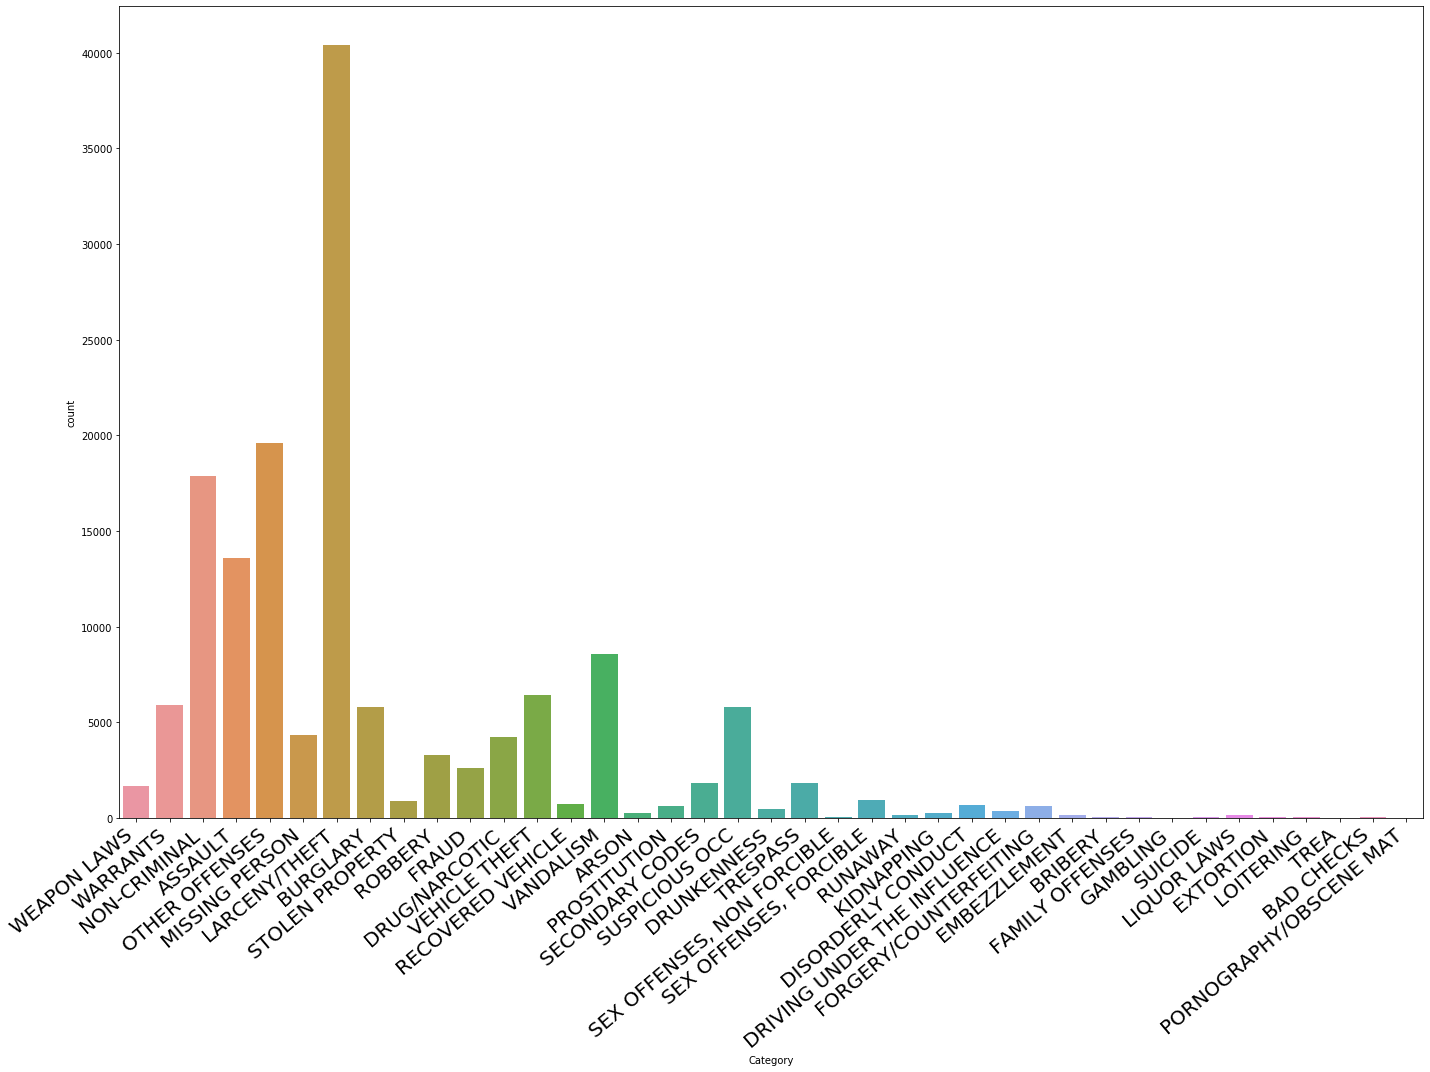

In [75]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x='Category', data=visual);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()
plt.show()

b. The distribution of crimes per days of the week:

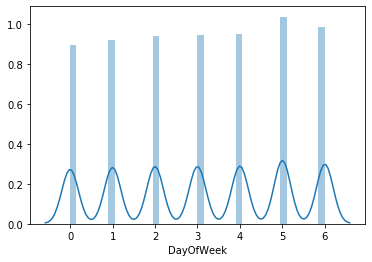

In [76]:
days = sns.distplot(visual['DayOfWeek'])
days;

c. The Numeric variable

### 2.3 Repeat this process for the remaining variables you identifed in part 1.1

a. Crime of Larceny/Theft per time of day:

In [124]:
visual['Time'] = pd.to_datetime(visual['Time'])
times = []
for date in visual['Time']:
    times.append(date.time().strftime('%H:%M:%S'))
visual['Time'] = times

categories = visual.reset_index().groupby('Category').count().sort_values(by='index', ascending = False).head(1).index.tolist()

In [123]:
counting = visual[visual['Category'].isin(categories)]
counting = counting.reset_index().groupby(['Time','Category'], as_index=False).count().rename(columns={'index':'ct'})

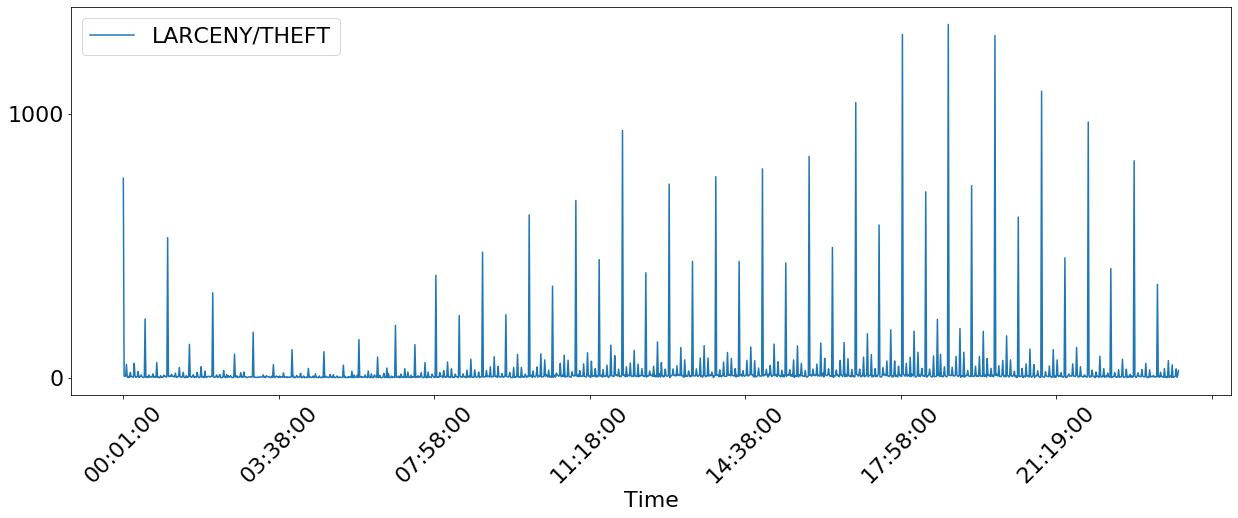

In [122]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
# key gives the group name (i.e. category), data gives the actual values
for key, data in counting.groupby('Category'):
    data.plot(x='Time', y='ct', ax=ax, label=key)

plt.rcParams.update({'font.size': 100})
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()


b. Crime by district:

In [144]:
district = visual[visual['Category'].isin(categories)]
district = district.reset_index().groupby(['PdDistrict','Category'], as_index=False).count().rename(columns={'index':'count'})
district

,PdDistrict,Category,count,IncidntNum,Descript,DayOfWeek,Date,Time,Resolution,Address,Latitude,Longitude,Location,Department_ID
0,BAYVIEW,LARCENY/THEFT,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357
1,CENTRAL,LARCENY/THEFT,6740,6740,6740,6740,6740,6740,6740,6740,6740,6740,6740,6740
2,INGLESIDE,LARCENY/THEFT,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781
3,MISSION,LARCENY/THEFT,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321
4,NORTHERN,LARCENY/THEFT,7219,7219,7219,7219,7219,7219,7219,7219,7219,7219,7219,7219
5,PARK,LARCENY/THEFT,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
6,RICHMOND,LARCENY/THEFT,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133
7,SOUTHERN,LARCENY/THEFT,9203,9203,9203,9203,9203,9203,9203,9203,9203,9203,9203,9203
8,TARAVAL,LARCENY/THEFT,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605
9,TENDERLOIN,LARCENY/THEFT,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825


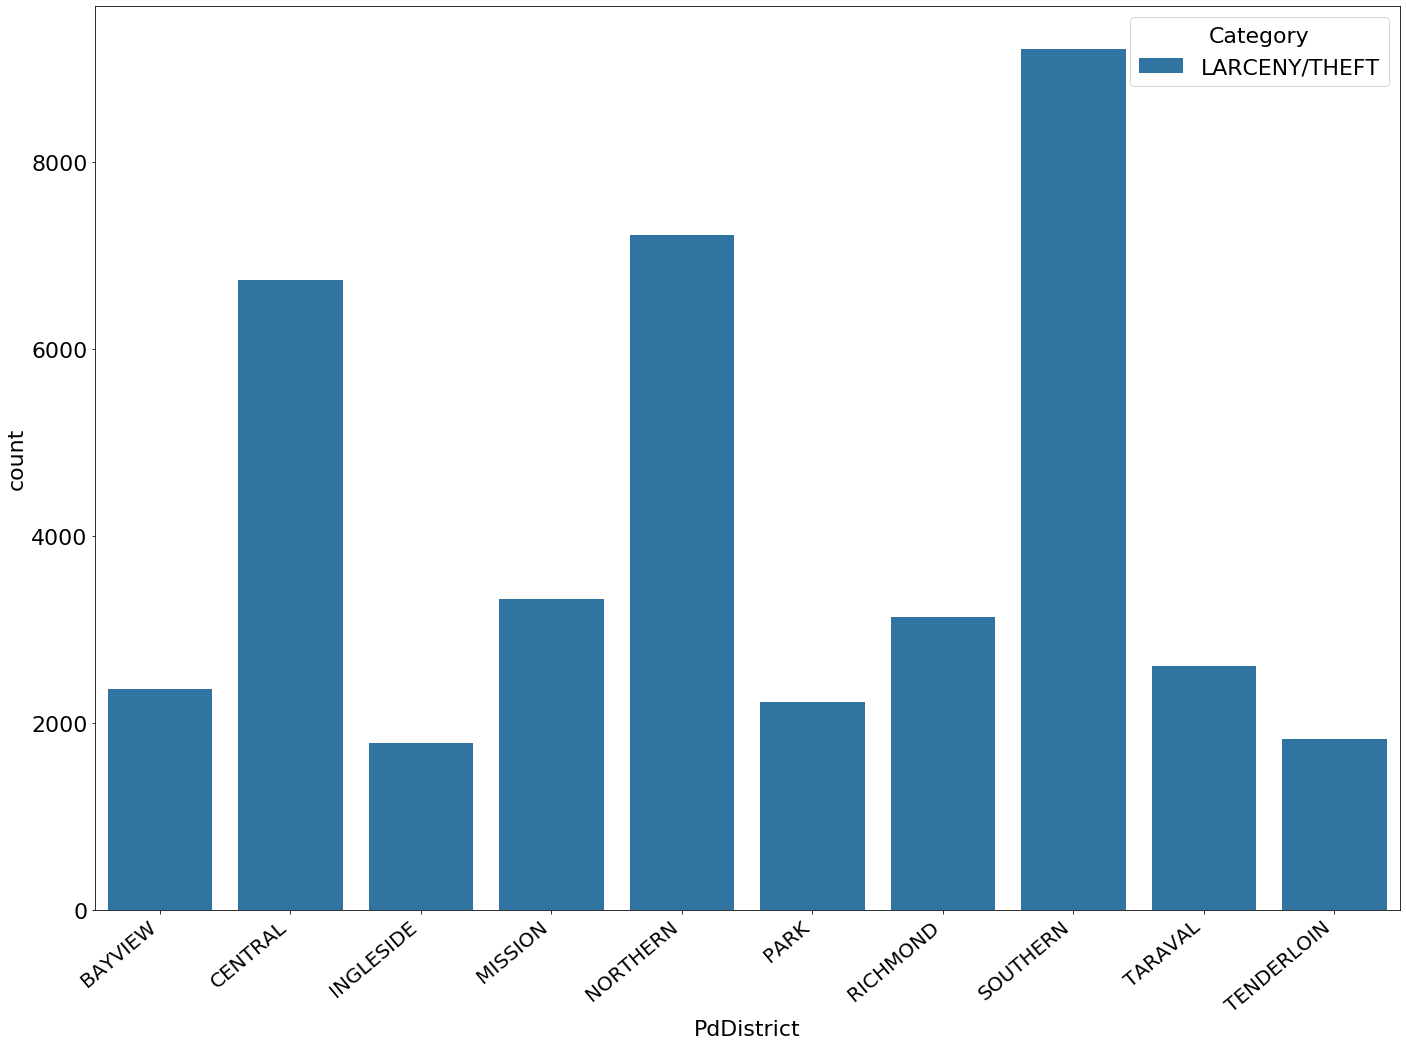

In [145]:
plt.figure(figsize=(20,15))
cx = sns.barplot(x="PdDistrict", y="count", hue="Category", data=district)
cx.set_xticklabels(cx.get_xticklabels(), rotation=40, ha="right")
cx.set_xticklabels(cx.get_xticklabels(), fontsize=20)
plt.tight_layout()
plt.show()


c. Proportion of crimes that lead to arrest and booking by district:

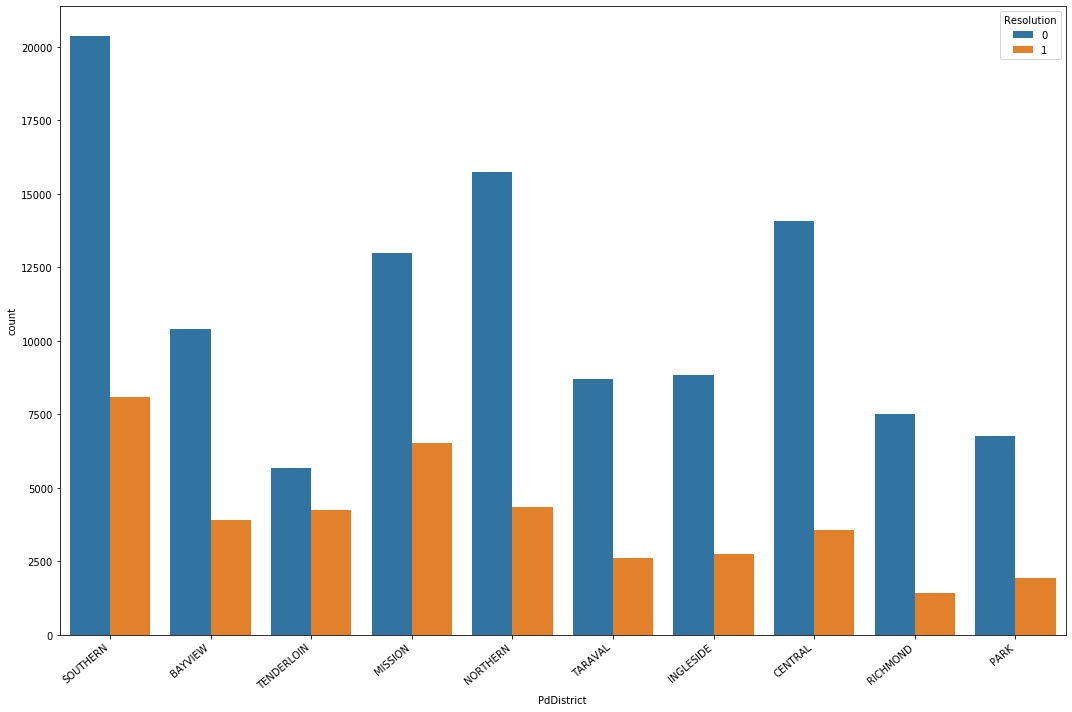

In [73]:
arrests = []
for arrest in visual['Resolution']:
    if arrest == 'ARREST, BOOKED':
        arrests.append(1)
    else:
        arrests.append(0)
        
visual['Resolution'] = arrests

plt.figure(figsize=(15,10))

bx = sns.countplot(x='PdDistrict',hue ='Resolution', data=visual);
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")
bx.set_xticklabels(bx.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()